In [299]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# import library

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# read data

In [2]:
df=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')


In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [5]:
df.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [305]:
df_subset = df.iloc[20:60,24:30]  # Note: Python uses 0-based indexing
#print(df_subset)

In [306]:
df_subset = df.iloc[20:60, 25:27]  # Note: Python uses 0-based indexing
#print(df_subset)

In [307]:
df_subset = df.iloc[20:60, 57:65]  
#print(df_subset)

In [308]:
df_subset = df.iloc[20:60, 73:77] 
#print(df_subset)

# drop id

In [6]:
df.drop('Id',axis=1.,inplace=True)
test.drop('Id',axis=1.,inplace=True)

In [7]:
# separate data into types
obj_column=df.select_dtypes(include=['object'])
non_obj_column=df.select_dtypes(exclude=['object'])
columns_with_null =df.columns[df.isnull().any()]

# for test data
obj_column_test=test.select_dtypes(include=['object'])
non_obj_column_test=test.select_dtypes(exclude=['object'])
columns_with_null_test =test.columns[test.isnull().any()]

# treat with null

In [8]:
for column in columns_with_null:
     if column in obj_column and column in columns_with_null:
        null_percentage = (df[column].isnull().mean() * 100).round(2)
        print(f"Null Percentage in '{column}': {null_percentage}%")

Null Percentage in 'Alley': 93.77%
Null Percentage in 'MasVnrType': 59.73%
Null Percentage in 'BsmtQual': 2.53%
Null Percentage in 'BsmtCond': 2.53%
Null Percentage in 'BsmtExposure': 2.6%
Null Percentage in 'BsmtFinType1': 2.53%
Null Percentage in 'BsmtFinType2': 2.6%
Null Percentage in 'Electrical': 0.07%
Null Percentage in 'FireplaceQu': 47.26%
Null Percentage in 'GarageType': 5.55%
Null Percentage in 'GarageFinish': 5.55%
Null Percentage in 'GarageQual': 5.55%
Null Percentage in 'GarageCond': 5.55%
Null Percentage in 'PoolQC': 99.52%
Null Percentage in 'Fence': 80.75%
Null Percentage in 'MiscFeature': 96.3%


In [9]:
# data has meaning of null
obj_null_meaning=['Alley','BsmtQual','BsmtCond','BsmtExposure',
                  'BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType'
                  ,'GarageFinish','GarageQual','GarageCond','PoolQC'
                 ,'Fence','MiscFeature']
for column in obj_null_meaning :
    df[column]  = df[column].fillna('not_available_in_building')
    test[column] = test[column].fillna('not_available_in_building')
    


In [10]:
df['Electrical']=df['Electrical'].fillna('unknownn')
test['Electrical']=test['Electrical'].fillna('unknownn')
df['MasVnrType']=df['MasVnrType'].fillna('unknownn')
test['MasVnrType']=test['MasVnrType'].fillna('unknownn')

In [11]:
#column have missing and no meaning
['MasVnrType','MasVnrArea','Electrical']

['MasVnrType', 'MasVnrArea', 'Electrical']

In [12]:
for column in columns_with_null:
     if column in non_obj_column and column in columns_with_null:
        null_percentage = (df[column].isnull().mean() * 100).round(2)
        print(f"Null Percentage in '{column}': {null_percentage}%")

Null Percentage in 'LotFrontage': 17.74%
Null Percentage in 'MasVnrArea': 0.55%
Null Percentage in 'GarageYrBlt': 5.55%


In [13]:
#df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mean())
#test['MasVnrArea']=test['MasVnrArea'].fillna(test['MasVnrArea'].mean())
df['MasVnrArea']=df['MasVnrArea'].fillna(0)
test['MasVnrArea']=test['MasVnrArea'].fillna(0)


In [14]:
mean_value = df['LotFrontage'].mean()
df['LotFrontage']=df['LotFrontage'].fillna(mean_value)

In [15]:
#df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())
#test['GarageYrBlt']=test['GarageYrBlt'].fillna(test['GarageYrBlt'].mean())
df['GarageYrBlt']=df['GarageYrBlt'].fillna(0)
test['GarageYrBlt']=test['GarageYrBlt'].fillna(0)

df['GarageYrBlt'].fillna(0, inplace=True)
test['GarageYrBlt'].fillna(0, inplace=True)

# treat with test missing

In [16]:
for column in columns_with_null_test:
     if column in obj_column_test and column in columns_with_null_test:
        null_percentage = (test[column].isnull().mean() * 100).round(5)
        print(f"Null Percentage in '{column}': {null_percentage}%")

Null Percentage in 'MSZoning': 0.27416%
Null Percentage in 'Alley': 0.0%
Null Percentage in 'Utilities': 0.13708%
Null Percentage in 'Exterior1st': 0.06854%
Null Percentage in 'Exterior2nd': 0.06854%
Null Percentage in 'MasVnrType': 0.0%
Null Percentage in 'BsmtQual': 0.0%
Null Percentage in 'BsmtCond': 0.0%
Null Percentage in 'BsmtExposure': 0.0%
Null Percentage in 'BsmtFinType1': 0.0%
Null Percentage in 'BsmtFinType2': 0.0%
Null Percentage in 'KitchenQual': 0.06854%
Null Percentage in 'Functional': 0.13708%
Null Percentage in 'FireplaceQu': 0.0%
Null Percentage in 'GarageType': 0.0%
Null Percentage in 'GarageFinish': 0.0%
Null Percentage in 'GarageQual': 0.0%
Null Percentage in 'GarageCond': 0.0%
Null Percentage in 'PoolQC': 0.0%
Null Percentage in 'Fence': 0.0%
Null Percentage in 'MiscFeature': 0.0%
Null Percentage in 'SaleType': 0.06854%


In [17]:
for column in columns_with_null_test:
    if column in obj_column_test and column in columns_with_null_test:
        test[column]=test[column].fillna(test[column].mode().iloc[0])
    

In [18]:
for column in columns_with_null_test:
     if column in non_obj_column_test and column in columns_with_null_test:
        null_percentage = (test[column].isnull().mean() * 100).round(5)
        print(f"Null Percentage in '{column}': {null_percentage}%")

Null Percentage in 'LotFrontage': 15.5586%
Null Percentage in 'MasVnrArea': 0.0%
Null Percentage in 'BsmtFinSF1': 0.06854%
Null Percentage in 'BsmtFinSF2': 0.06854%
Null Percentage in 'BsmtUnfSF': 0.06854%
Null Percentage in 'TotalBsmtSF': 0.06854%
Null Percentage in 'BsmtFullBath': 0.13708%
Null Percentage in 'BsmtHalfBath': 0.13708%
Null Percentage in 'GarageYrBlt': 0.0%
Null Percentage in 'GarageCars': 0.06854%
Null Percentage in 'GarageArea': 0.06854%


In [19]:
for column in columns_with_null_test:
     if column in non_obj_column_test and column in columns_with_null_test:
             test[column]= test[column].fillna(test[column].mean())

In [20]:
columns_with_null.size

19

In [21]:
columns_with_null_test.size

33

In [22]:
columns_with_null =df.columns[df.isnull().any()]
columns_with_null

Index([], dtype='object')

In [23]:
columns_with_null_test =test.columns[test.isnull().any()]
columns_with_null_test

Index([], dtype='object')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [25]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

for column in df.columns:
    unique_values = df[column].unique()
    print(f'Unique values in {column}:\n{unique_values}')
    print('-' * 30)

# before model

# remove traget

In [26]:
y = np.log(df['SalePrice'])
y_no = df['SalePrice']

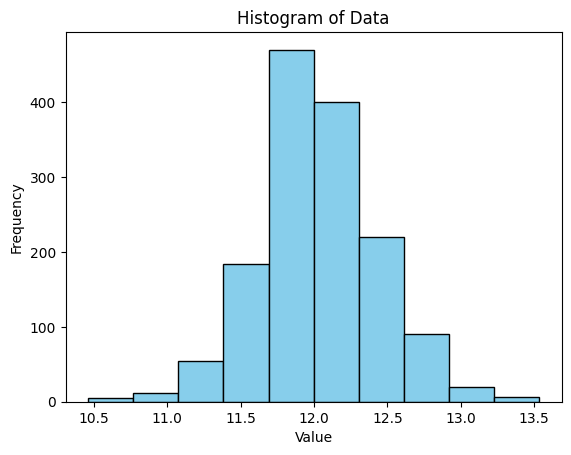

In [27]:
import matplotlib.pyplot as plt

# Example list of data
# data = [1, 2, 3, 4, 5, 5, 6, 6, 6, 7, 8, 8, 8, 8, 9, 9, 10]

# Create histogram
plt.hist(np.log(y_no),color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data')

# Show plot
plt.show()


In [331]:
y

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

In [28]:
 train_set=df.drop('SalePrice',axis=1 )

# transform log1 to be normal

In [29]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame containing numerical features
numerical_features = train_set.select_dtypes(exclude=['object']).columns
#non_obj_column=df.select_dtypes(exclude=['object'])

# Calculate skewness for numerical features
skewed_features = train_set[numerical_features].apply(lambda x: x.skew()).sort_values(ascending=False)

# Select features with skewness greater than a threshold (e.g., 0.5)
skewed_threshold = 0.5
skewed_features = skewed_features[abs(skewed_features) > skewed_threshold]

# Apply log transformation to skewed numerical features
for feature in skewed_features.index:
    train_set[feature] = np.log1p(train_set[feature])  # Log transformation to handle skewness
    test[feature]=np.log1p(test[feature])
# Now, your DataFrame df contains normalized skewed numerical features


In [30]:
obj_column=df.select_dtypes(include=['object'])
non_obj_column=df.select_dtypes(exclude=['object'])
columns_with_null =df.columns[df.isnull().any()]
#non_obj_column_without_target=non_obj_column.drop('SalePrice',axis=1)
# for test data
obj_column_test=test.select_dtypes(include=['object'])
non_obj_column_test=test.select_dtypes(exclude=['object'])
columns_with_null_test =test.columns[test.isnull().any()]

In [31]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   float64
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   float64
 4   Street         1459 non-null   object 
 5   Alley          1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   float64
 18  YearBuil

# normalizing

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

# # Apply Min-Max scaling to your DataFrame
# df_normalized = pd.DataFrame(scaler.fit_transform(non_obj_column), columns=non_obj_column.columns)
# df_normalized_test = pd.DataFrame(scaler.fit_transform(non_obj_column_test), columns=non_obj_column_test.columns)

# # Now, df_normalized contains the normalized values
# print(df_normalized)

In [ ]:
# for columns in df_normalized :
#     df[columns]=df_normalized[columns]
    

In [ ]:
# for columns in df_normalized_test :
#     #df[columns]=df_normalized[columns]
#     test[columns]=df_normalized_test[columns]

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from category_encoders import TargetEncoder
from category_encoders import CatBoostEncoder



# encode data

In [33]:

target_data=train_set

categorical_columns = df.select_dtypes(include=['object']).columns
  

## target encoder

In [34]:
# #label_encoder = LabelEncoder()
encoder = TargetEncoder(cols=categorical_columns) ##

train_df_encoded = encoder.fit_transform(target_data, y)
test_df_encoded = encoder.transform(test)

## cat encoder

In [339]:
# encoder = CatBoostEncoder(cols=categorical_columns)
# train_df_encoded = encoder.fit_transform(train_set, y)
# test_df_encoded = encoder.transform(test)

In [35]:
df_subset = train_df_encoded.iloc[20:60, 75:80] 
print(df_subset)

    MoSold  YrSold   SaleType  SaleCondition
20      11    2006  12.459356      12.447465
21       6    2007  11.991061      12.005034
22       9    2008  11.991061      12.005034
23       6    2007  11.991061      12.005034
24       5    2010  11.991061      12.005034
25       7    2009  11.991061      12.005034
26       5    2010  11.991061      12.005034
27       5    2010  11.991061      12.005034
28      12    2006  11.991061      12.005034
29       5    2008  11.991061      12.005034
30       7    2008  11.991061      12.005034
31       6    2008  11.991061      12.005034
32       1    2008  11.991061      12.005034
33       4    2010  11.991061      12.005034
34       8    2007  11.991061      12.005034
35       9    2006  11.991061      12.005034
36       6    2009  11.991061      12.005034
37      10    2009  11.991061      12.005034
38       1    2010  11.991061      11.788846
39       6    2008  11.991061      11.940916
40      12    2006  11.991061      11.788846
41       7

# PCA    to add as features

In [341]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
def pca_finc(percintage):


    # Assuming df is your DataFrame with numerical columns
    # Extract the features (X) from the DataFrame
    X = train_df_encoded.values

    # Step 1: Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Step 2: Perform PCA using scikit-learn
    pca = PCA(n_components=percintage)  # You can set the number of components or explained variance
    X_pca = pca.fit_transform(X_scaled)

    # Create a new DataFrame with the principal components
    columns_pca = [f'PC{i+1}' for i in range(X_pca.shape[1])]
    df_pca = pd.DataFrame(data=X_pca, columns=columns_pca)

    # Concatenate the new DataFrame with the original DataFrame if needed
    df_combined = pd.concat([df, df_pca], axis=1)

    # Display the resulting DataFrame
    print(df_pca.shape)
    return df_pca


# Rank the pca

In [342]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
def pca_k(df,nume_k):
    df= df.select_dtypes(exclude=['object'])
    # Assuming df is your original DataFrame
    train_df_encoded= df
    df_fca = train_df_encoded.values
    # Step 1: Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(train_df_encoded)

    # Step 2: Perform PCA using scikit-learn
    percentage = 0.935  # You can set the desired explained variance
    pca = PCA(n_components=percentage)
    X_pca = pca.fit_transform(X_scaled)

    # Create a new DataFrame with the top-k principal components
    k = nume_k  # Adjust as needed
    columns_pca_top_k = [f'PC{i+1}' for i in range(k)]
    df_pca_top_k = pd.DataFrame(data=X_pca[:, :k], columns=columns_pca_top_k)

    # Concatenate the new DataFrame with the original DataFrame
    df_combined = pd.concat([train_df_encoded, df_pca_top_k], axis=1)

    # Display the resulting DataFrame
    #print(df_pca_top_k.coulmns)
    return df_pca_top_k


# feature selection

In [37]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [57]:
#df_selected
min_score = []
my_dict = {}
for i in range(1,2):
    print('>>>>>>>>>>>>>>>>>>',i)
    feature=random_feature(train_df_encoded,70) 
#     decision_tree_model = DecisionTreeRegressor()
#     linear_regression_model = LinearRegression()
    lasso_model = Lasso(alpha=0.0005)  # Specify the alpha value for Lasso
    ridge_model = Ridge(alpha=.005)
    n_splits = 5
    kfold = KFold(n_splits=n_splits, shuffle=False)
    # Cross-validate Decision Tree model
    dt_scores = cross_val_score(lasso_model,feature, y, cv=kfold, scoring='neg_mean_squared_error')
    #print((-dt_scores)**0.5)
    print("Decision Tree Cross-Validation Mean RMSE:", (-dt_scores.mean())**0.5)

    # Cross-validate Linear Regression model
    lr_scores = cross_val_score(ridge_model, feature, y, cv=kfold, scoring='neg_mean_squared_error')
    #print((-lr_scores)**0.5)
    print("Linear Regression Cross-Validation Mean RMSE:", (-lr_scores.mean())**0.5)
    min_score.append((-lr_scores.mean())**0.5)
    my_dict[i] =(-lr_scores.mean())**0.5
print("Minimum Number:", min(min_score))  
min_key = min(my_dict, key=my_dict.get)

# Get the minimum value
min_value = my_dict[min_key]

# Print the key and value with the minimum value
print("Key with Minimum Value:", min_key)
print("Minimum Value:", min_value)

>>>>>>>>>>>>>>>>>> 1
['MiscVal', 'BsmtQual', 'ScreenPorch', 'BedroomAbvGr', 'MasVnrType', 'OpenPorchSF', 'TotalBsmtSF', 'OverallCond', 'MiscFeature', 'PavedDrive', 'Utilities', 'BsmtFullBath', '1stFlrSF', 'OverallQual', 'Condition2', 'BsmtExposure', 'BsmtCond', 'Condition1', 'LandContour', 'LowQualFinSF', 'Neighborhood', 'Alley', 'BsmtFinSF2', 'BsmtFinType1', 'EnclosedPorch', 'SaleCondition', 'ExterCond', 'LotShape', 'TotRmsAbvGrd', 'GarageCars', 'YrSold', 'Electrical', 'RoofStyle', 'GarageFinish', 'PoolArea', 'BldgType', 'LotArea', 'HouseStyle', 'FireplaceQu', 'FullBath', 'MasVnrArea', 'BsmtFinSF1', 'GarageCond', 'KitchenQual', 'GarageArea', 'MSZoning', 'KitchenAbvGr', 'LotFrontage', 'Fireplaces', 'MoSold', 'LotConfig', 'YearBuilt', 'MSSubClass', 'BsmtFinType2', 'HeatingQC', 'Foundation', 'BsmtUnfSF', 'Heating', 'Fence', 'Street', 'YearRemodAdd', 'GrLivArea', 'BsmtHalfBath', 'GarageQual', 'HalfBath', 'SaleType', '3SsnPorch', 'Exterior2nd', 'GarageYrBlt', 'RoofMatl']
Decision Tree Cros

In [56]:
from sklearn.linear_model import Lasso, Ridge

lasso_model = Lasso(alpha=0.000005)  # Specify the alpha value for Lasso
ridge_model = Ridge(alpha=.0005)  # Specify the alpha value for Ridge

# Define the number of splits for k-fold cross-validation
n_splits = 5
kfold = KFold(n_splits=n_splits, shuffle=False)

# Cross-validate Lasso model
lasso_scores = cross_val_score(lasso_model, train_df_encoded, y, cv=kfold, scoring='neg_mean_squared_error')
print("Lasso Cross-Validation Mean RMSE:", np.sqrt(-lasso_scores.mean()))

# Cross-validate Ridge model
ridge_scores = cross_val_score(ridge_model, train_df_encoded, y, cv=kfold, scoring='neg_mean_squared_error')
print("Ridge Cross-Validation Mean RMSE:", np.sqrt(-ridge_scores.mean()))


Lasso Cross-Validation Mean RMSE: 0.1296905697560985
Ridge Cross-Validation Mean RMSE: 0.12955391832716898


# treat with correlated column 

In [58]:
import numpy as np
corr_matrix = train_df_encoded.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.8)]
df_selected = train_df_encoded.drop(to_drop, axis=1)
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 69 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   float64
 1   MSZoning       1460 non-null   float64
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   Street         1460 non-null   float64
 5   Alley          1460 non-null   float64
 6   LotShape       1460 non-null   float64
 7   LandContour    1460 non-null   float64
 8   Utilities      1460 non-null   float64
 9   LotConfig      1460 non-null   float64
 10  LandSlope      1460 non-null   float64
 11  Neighborhood   1460 non-null   float64
 12  Condition1     1460 non-null   float64
 13  Condition2     1460 non-null   float64
 14  BldgType       1460 non-null   float64
 15  HouseStyle     1460 non-null   float64
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   float64
 18  YearBuil

# sample compination of feature

In [59]:
import random
def random_feature(df_selected,number_of_sample):


    selected_items = random.sample(df_selected.columns.tolist(), number_of_sample)
    print(selected_items)
    return df_selected[selected_items]



In [60]:
feature=random_feature(df_selected,10)
feature

['Utilities', '1stFlrSF', 'GrLivArea', 'PoolArea', 'ScreenPorch', 'LandContour', 'WoodDeckSF', 'HouseStyle', 'OpenPorchSF', 'MSZoning']


,Utilities,1stFlrSF,GrLivArea,PoolArea,ScreenPorch,LandContour,WoodDeckSF,HouseStyle,OpenPorchSF,MSZoning
0,12.024183,6.753438,7.444833,0.0,0.0,12.022694,0.000000,12.182686,4.127134,12.085885
1,12.024183,7.141245,7.141245,0.0,0.0,12.022694,5.700444,11.993683,0.000000,12.085885
2,12.024183,6.825460,7.488294,0.0,0.0,12.022694,0.000000,12.182686,3.761200,12.085885
3,12.024183,6.869014,7.448916,0.0,0.0,12.022694,0.000000,12.182686,3.583519,12.085885
4,12.024183,7.044033,7.695758,0.0,0.0,12.022694,5.262690,12.182686,4.442651,12.085885
...,...,...,...,...,...,...,...,...,...,...
1455,12.024183,6.860664,7.407318,0.0,0.0,12.022694,0.000000,12.182686,3.713572,12.085885
1456,12.024183,7.637234,7.637234,0.0,0.0,12.022694,5.857933,11.993683,0.000000,12.085885
1457,12.024183,7.080868,7.758333,0.0,0.0,12.022694,0.000000,12.182686,4.110874,12.085885
1458,12.024183,6.983790,6.983790,0.0,0.0,12.022694,5.905362,11.993683,0.000000,12.085885


# select  important feature;

In [61]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression  


estimator = LinearRegression()  

rfe = RFE(estimator, n_features_to_select=5) 

rfe.fit(train_df_encoded, y)  
# Get the selected features
selected_features = train_df_encoded.columns[rfe.support_]  
print("Selected features:", selected_features)

# Optionally, you can access the ranking of features
feature_ranking = rfe.ranking_
print("Feature ranking:", feature_ranking)


Selected features: Index(['Utilities', 'YearBuilt', 'YearRemodAdd', 'RoofMatl', 'PoolQC'], dtype='object')
Feature ranking: [58 30 61 29  7 38 47 14  1 18 21  6 13 12  3 11 31  9  1  1 10  1 15 16
 63 64 41 22 39 25 36  8 59 55 65 70 66 69  2 27 23 37 53 52 49  5 24 57
 50 51 68 32 20 46  4 35 54 42 48 43 33 75 45 40 26 62 73 74 67 56 34  1
 44 28 71 72 60 19 17]


In [71]:
best_feature=['YearBuilt', 'Neighborhood', 'BsmtQual', 'EnclosedPorch', '3SsnPorch', 
 'LotArea', 'BsmtHalfBath', 'MSZoning', 'Functional', 'PoolQC',
 'SaleType', 'GarageType', 'CentralAir', 'GarageCars', 'YearRemodAdd',
 'Exterior1st', 'MasVnrType', 'BsmtUnfSF', 'WoodDeckSF', 'BldgType',
 'BsmtFinType2', 'MiscFeature', 'MoSold', 'BsmtFinSF2', 'HalfBath', 
 'PoolArea', 'HeatingQC', 'LandSlope', 'HouseStyle', 'LandContour', 
 'Foundation', 'BsmtFullBath', 'GarageYrBlt', 'GrLivArea', 'OpenPorchSF',
 'GarageFinish', 'BedroomAbvGr', 'BsmtExposure', 'Fence', 'Alley',
  'YrSold', 'PavedDrive', 'Fireplaces', 'Condition1',
 'OverallQual', 'LotConfig',  'KitchenQual', 'RoofMatl',
 'ScreenPorch', 'LotShape', '2ndFlrSF', 'FullBath', 'BsmtFinType1', 
 'Electrical', 'OverallCond']
best22=['Electrical', 'YrSold', 'Exterior1st', 'PavedDrive', 'LotConfig', 
 'LotArea', '2ndFlrSF', 'Fence', 'GarageYrBlt', 'HeatingQC', 'MoSold', 
 'GarageType', 'BedroomAbvGr', 'YearBuilt', 'BsmtHalfBath', 'BsmtExposure',
 'HalfBath', 'LandSlope', 'FullBath', 'PoolArea', 'MasVnrType', 'LandContour',
 'Alley', 'SaleType', 'GarageFinish', 'BsmtFinType2', 'BsmtQual', 'Functional', 
 'WoodDeckSF', 'Foundation', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtFinType1', 'MSZoning', 
 'KitchenQual', 'Neighborhood', 'OpenPorchSF', 'HouseStyle', 'BldgType', 'GrLivArea',
 'RoofMatl', 'Condition1', 'Fireplaces', 
 'OverallCond', 'CentralAir', 'PoolQC', 'OverallQual', 'GarageCars', 'ScreenPorch'] # 
df_selected_new=df_selected[best22]# 'MasVnrArea','MiscVal',,
df_selected_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 49 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Electrical    1460 non-null   float64
 1   YrSold        1460 non-null   int64  
 2   Exterior1st   1460 non-null   float64
 3   PavedDrive    1460 non-null   float64
 4   LotConfig     1460 non-null   float64
 5   LotArea       1460 non-null   float64
 6   2ndFlrSF      1460 non-null   float64
 7   Fence         1460 non-null   float64
 8   GarageYrBlt   1460 non-null   float64
 9   HeatingQC     1460 non-null   float64
 10  MoSold        1460 non-null   int64  
 11  GarageType    1460 non-null   float64
 12  BedroomAbvGr  1460 non-null   int64  
 13  YearBuilt     1460 non-null   float64
 14  BsmtHalfBath  1460 non-null   float64
 15  BsmtExposure  1460 non-null   float64
 16  HalfBath      1460 non-null   float64
 17  LandSlope     1460 non-null   float64
 18  FullBath      1460 non-null 

In [72]:
print(len(best22))

49


# feature selection with DecisionTreeRegressor

Feature Importances:
         Feature  Importance
16   OverallQual    0.565017
42     GrLivArea    0.123177
11  Neighborhood    0.049467
37    CentralAir    0.044114
39      1stFlrSF    0.034010
..           ...         ...
35       Heating    0.000001
21      RoofMatl    0.000000
62      PoolArea    0.000000
4         Street    0.000000
13    Condition2    0.000000

[69 rows x 2 columns]


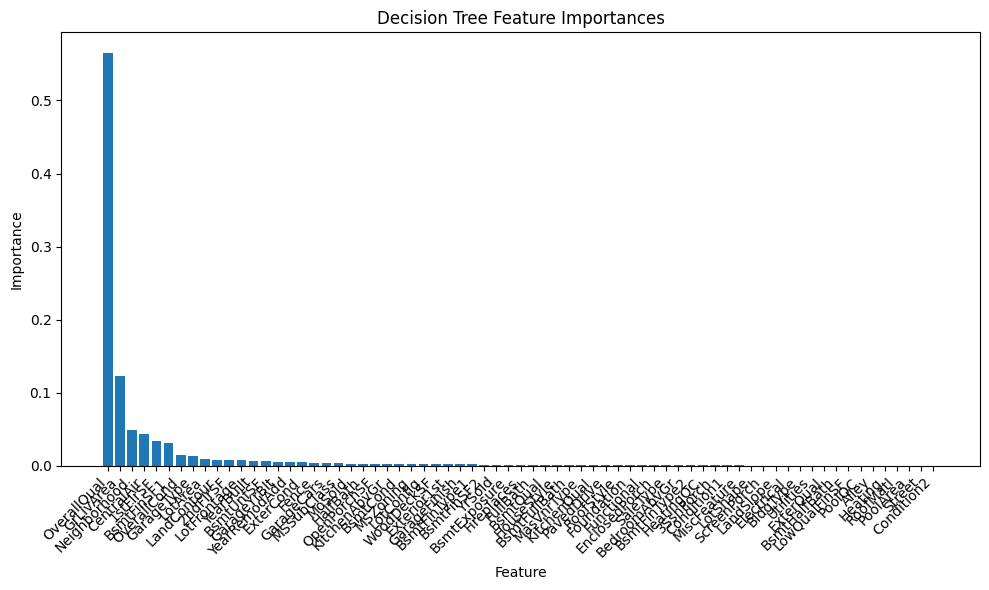

In [62]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import pandas as pd
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(df_selected,y)
feature_importances = regressor.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': df_selected.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
sorted_feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or use the sorted feature importances
print("Feature Importances:")
print(sorted_feature_importance_df)

# Optional: Plot the feature importances
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_importance_df['Feature'], sorted_feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Decision Tree Feature Importances')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [63]:
listoo=sorted_feature_importance_df['Feature'].head(8).tolist()
listoo
decision_tree_importance=df_selected[sorted_feature_importance_df['Feature'].head(8).tolist()]
decision_tree_importance.head()

,OverallQual,GrLivArea,Neighborhood,CentralAir,1stFlrSF,BsmtFinSF1,OverallCond,GarageType
0,7,7.444833,12.163641,12.06109,6.753438,6.561031,1.791759,12.160778
1,6,7.141245,12.116583,12.06109,7.141245,6.886532,2.197225,12.160778
2,7,7.488294,12.163641,12.06109,6.825460,6.188264,1.791759,12.160778
3,7,7.448916,12.198787,12.06109,6.869014,5.379897,1.791759,11.765643
4,8,7.695758,12.604875,12.06109,7.044033,6.486161,1.791759,12.160778


In [350]:
[]

[]

In [351]:
df_subset = train_df_encoded.iloc[20:60, 72:77] 
#print(df_subset)

# normalize data

In [64]:
def min_max_scaling(column):
    return (column - column.min()) / (column.max() - column.min())

In [65]:
def denormalize_target_min_max(predicted_target, original_target):
    return predicted_target * (original_target.max() - original_target.min()) + original_target.min()

In [354]:
y_no

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

y = np.log(df['SalePrice'])
x=df.drop('SalePrice', axis=1)

In [66]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LinearRegression

In [67]:

import math

# Function to calculate binomial coefficient (n choose k)
def binomial_coefficient(n, k):
    return math.factorial(n) // (math.factorial(k) * math.factorial(n - k))

# Set values
n = 80  # total number of items
k = 10  # number of items to choose

# Calculate C(80,10)
combinations = binomial_coefficient(n, k)

# Print the result
print("Number of ways to choose 10 items out of 80:", combinations)


Number of ways to choose 10 items out of 80: 1646492110120


In [359]:
df_selected_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 49 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Electrical    1460 non-null   float64
 1   YrSold        1460 non-null   int64  
 2   Exterior1st   1460 non-null   float64
 3   PavedDrive    1460 non-null   float64
 4   LotConfig     1460 non-null   float64
 5   LotArea       1460 non-null   float64
 6   2ndFlrSF      1460 non-null   float64
 7   Fence         1460 non-null   float64
 8   GarageYrBlt   1460 non-null   float64
 9   HeatingQC     1460 non-null   float64
 10  MoSold        1460 non-null   int64  
 11  GarageType    1460 non-null   float64
 12  BedroomAbvGr  1460 non-null   int64  
 13  YearBuilt     1460 non-null   int64  
 14  BsmtHalfBath  1460 non-null   float64
 15  BsmtExposure  1460 non-null   float64
 16  HalfBath      1460 non-null   int64  
 17  LandSlope     1460 non-null   float64
 18  FullBath      1460 non-null 

# selected feature

In [409]:
#df_selected
min_score = []
my_dict = {}
for i in range(1,2):
    print('>>>>>>>>>>>>>>>>>>',i)
    feature=random_feature(df_selected_new,40) 
    decision_tree_model = DecisionTreeRegressor()
    linear_regression_model = LinearRegression()
    n_splits = 5
    kfold = KFold(n_splits=n_splits, shuffle=False)
    # Cross-validate Decision Tree model
    dt_scores = cross_val_score(decision_tree_model,feature, y, cv=kfold, scoring='neg_mean_squared_error')
    #print((-dt_scores)**0.5)
    print("Decision Tree Cross-Validation Mean RMSE:", (-dt_scores.mean())**0.5)

    # Cross-validate Linear Regression model
    lr_scores = cross_val_score(linear_regression_model, feature, y, cv=kfold, scoring='neg_mean_squared_error')
    #print((-lr_scores)**0.5)
    print("Linear Regression Cross-Validation Mean RMSE:", (-lr_scores.mean())**0.5)
    min_score.append((-lr_scores.mean())**0.5)
    my_dict[i] =(-lr_scores.mean())**0.5
print("Minimum Number:", min(min_score))  
min_key = min(my_dict, key=my_dict.get)

# Get the minimum value
min_value = my_dict[min_key]

# Print the key and value with the minimum value
print("Key with Minimum Value:", min_key)
print("Minimum Value:", min_value)

>>>>>>>>>>>>>>>>>> 1
['BsmtQual', 'HalfBath', 'BedroomAbvGr', 'BsmtFullBath', 'Functional', 'GarageCars', 'PoolQC', 'YearBuilt', 'PavedDrive', 'Fence', 'GarageFinish', 'YrSold', 'LotArea', 'BldgType', 'Exterior1st', 'PoolArea', 'HouseStyle', 'HeatingQC', 'GarageYrBlt', 'BsmtHalfBath', 'MoSold', 'RoofMatl', 'BsmtExposure', 'BsmtFinType2', 'Alley', 'OverallCond', 'GrLivArea', 'OverallQual', 'BsmtFinSF2', 'ScreenPorch', 'GarageType', 'Electrical', 'MasVnrType', 'LotConfig', '2ndFlrSF', 'Foundation', 'Fireplaces', 'SaleType', 'Condition1', 'KitchenQual']
Decision Tree Cross-Validation Mean RMSE: 0.20818415590152772
Linear Regression Cross-Validation Mean RMSE: 0.1363956704351547
Minimum Number: 0.1363956704351547
Key with Minimum Value: 1
Minimum Value: 0.1363956704351547


In [369]:
pca_1272=['CentralAir', 'Foundation', 'GarageCars', 'GarageYrBlt', 'BsmtHalfBath', 
 'RoofMatl', 'BsmtFinSF2', 'Alley', 'LotArea', 'BsmtFullBath', 'HeatingQC',
 'HalfBath', 'OverallQual', 'BsmtExposure', 'MSZoning', 'LandSlope', 'BsmtQual', 
 'PC3', 'PC5', 'ScreenPorch', 'PC4', 'KitchenQual', 'Fireplaces', '2ndFlrSF',
 'OverallCond', 'GrLivArea', 'SaleType', 'PavedDrive', 'Functional', 'YrSold',
 'BldgType', 'PC2', 'YearBuilt', 'PC1', 'Exterior1st', 'Condition1', 'LotConfig', 'LandContour',
 'Neighborhood', 'HouseStyle']

In [411]:
#.1280
['BsmtHalfBath', 'HeatingQC', 'GarageYrBlt', '2ndFlrSF', 'LotConfig', 'LandSlope', 
 'PavedDrive', 'OverallCond', 'BsmtFullBath', 'Foundation', 'CentralAir', 'OverallQual', 
 'YrSold', 'LotArea', 'BsmtFinSF2', 'ScreenPorch', 'SaleType', 'Fence', 'GrLivArea', 
 'GarageType', 'BsmtQual', 'WoodDeckSF', 'Exterior1st', 'MSZoning', 'LandContour',
 'Neighborhood', 'HouseStyle', 'YearBuilt', 'Condition1', 'HalfBath', 'KitchenQual',
 'GarageCars', 'Fireplaces', 'RoofMatl', 'Functional', 'BldgType', 'BsmtExposure',
 'Alley']

['BsmtHalfBath',
 'HeatingQC',
 'GarageYrBlt',
 '2ndFlrSF',
 'LotConfig',
 'LandSlope',
 'PavedDrive',
 'OverallCond',
 'BsmtFullBath',
 'Foundation',
 'CentralAir',
 'OverallQual',
 'YrSold',
 'LotArea',
 'BsmtFinSF2',
 'ScreenPorch',
 'SaleType',
 'Fence',
 'GrLivArea',
 'GarageType',
 'BsmtQual',
 'WoodDeckSF',
 'Exterior1st',
 'MSZoning',
 'LandContour',
 'Neighborhood',
 'HouseStyle',
 'YearBuilt',
 'Condition1',
 'HalfBath',
 'KitchenQual',
 'GarageCars',
 'Fireplaces',
 'RoofMatl',
 'Functional',
 'BldgType',
 'BsmtExposure',
 'Alley']

# best feature 

In [413]:
#df_importance


decision_tree_model = DecisionTreeRegressor()
linear_regression_model = LinearRegression()
n_splits = 5

kfold = KFold(n_splits=n_splits, shuffle=False)
# Cross-validate Decision Tree model
dt_scores = cross_val_score(decision_tree_model,besto
                            , y, cv=kfold, scoring='neg_mean_squared_error')
print((-dt_scores)**0.5)
print("Decision Tree Cross-Validation Mean RMSE:", (-dt_scores.mean())**0.5)

# Cross-validate Linear Regression model
lr_scores = cross_val_score(linear_regression_model, besto
                            , y, cv=kfold, scoring='neg_mean_squared_error')
print((-lr_scores)**0.5)
print("Linear Regression Cross-Validation Mean RMSE:", (-lr_scores.mean())**0.5)

[0.20301543 0.23226488 0.17815349 0.1911007  0.18624754]
Decision Tree Cross-Validation Mean RMSE: 0.19905201697121727
[0.11154674 0.13497468 0.13158711 0.12024624 0.13973473]
Linear Regression Cross-Validation Mean RMSE: 0.12803199543318655


In [ ]:
import xgboost as xgb
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error
import pandas as pd

#Load your dataset

X =   besto
y = y

# Define RMSE as evaluation metric
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Create XGBoost model
#ridge_model = Ridge(alpha=3.0)
model = Ridge(alpha=1.0)

# Define k-fold cross-validation
kfold = KFold(n_splits=12, shuffle=True, random_state=42)

# Perform k-fold cross-validation
rmse_scores = cross_val_score(model, X, y, cv=kfold, scoring=make_scorer(rmse))

# Print RMSE scores for each fold
print("RMSE Scores:", rmse_scores)

# Calculate mean and standard deviation of RMSE scores
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)
print("Mean RMSE:", mean_rmse)
print("Standard Deviation of RMSE:", std_rmse)


In [419]:
print(np.exp(y_pred))

[109569.57900524 151618.00923711 167087.94830347 ... 173447.19631719
 119380.643484   211794.73246205]


In [420]:
print(np.exp(y_pred))

[109569.57900524 151618.00923711 167087.94830347 ... 173447.19631719
 119380.643484   211794.73246205]


In [421]:
test=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

result_df_norm = pd.DataFrame({
    'id': test['Id'],
    'SalePrice': np.exp(y_pred),})

result_df_norm.head(10)

,id,SalePrice
0,1461,109569.579005
1,1462,151618.009237
2,1463,167087.948303
3,1464,187271.046315
4,1465,202833.201234
5,1466,173356.852978
6,1467,183052.563463
7,1468,162372.645766
8,1469,207734.988032
9,1470,109688.270749


In [422]:
test=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

result_df_norm = pd.DataFrame({
    'id': test['Id'],
    'SalePrice': np.exp(y_pred),})

result_df_norm.head(10)

,id,SalePrice
0,1461,109569.579005
1,1462,151618.009237
2,1463,167087.948303
3,1464,187271.046315
4,1465,202833.201234
5,1466,173356.852978
6,1467,183052.563463
7,1468,162372.645766
8,1469,207734.988032
9,1470,109688.270749


In [391]:
result_df_norm.to_csv('submission2_norm.csv', index=False)

In [69]:
print('karim')

karim
